In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers, Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2022-11-28 17:44:01.552986: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# https://finance.yahoo.com/quote/TSLA/history?period1=1290643200&period2=1669334400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
df = pd.read_csv("./stock/TSLA_2010-2022.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
3,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
4,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500
...,...,...,...,...,...,...,...
3119,2022-11-17,183.960007,186.160004,180.899994,183.169998,183.169998,64336000
3120,2022-11-18,185.050003,185.190002,176.550003,180.190002,180.190002,75904900
3121,2022-11-21,175.850006,176.770004,167.539993,167.869995,167.869995,92882700
3122,2022-11-22,168.630005,170.919998,166.190002,169.910004,169.910004,78452300


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.Date

0      2010-06-30
1      2010-07-01
2      2010-07-02
3      2010-07-06
4      2010-07-07
          ...    
3119   2022-11-17
3120   2022-11-18
3121   2022-11-21
3122   2022-11-22
3123   2022-11-23
Name: Date, Length: 3124, dtype: datetime64[ns]

In [4]:
df.set_index('Date', inplace=True)

In [5]:
df.index

DatetimeIndex(['2010-06-30', '2010-07-01', '2010-07-02', '2010-07-06',
               '2010-07-07', '2010-07-08', '2010-07-09', '2010-07-12',
               '2010-07-13', '2010-07-14',
               ...
               '2022-11-10', '2022-11-11', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-21',
               '2022-11-22', '2022-11-23'],
              dtype='datetime64[ns]', name='Date', length=3124, freq=None)

In [6]:
df['2019-01']

/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_4233/541029262.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2019-01']


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500
2019-01-09,22.366667,22.900000,22.098000,22.568666,22.568666,81493500
2019-01-10,22.293333,23.025999,22.119333,22.997999,22.997999,90846000
2019-01-11,22.806000,23.227333,22.584667,23.150667,23.150667,75586500
2019-01-14,22.825333,22.833332,22.266666,22.293333,22.293333,78709500


In [7]:
df201901 = df['2019-01']

/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_4233/4132286796.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df201901 = df['2019-01']


In [8]:
df201901 = df201901.iloc[:, -2]
df201901

Date
2019-01-02    20.674667
2019-01-03    20.024000
2019-01-04    21.179333
2019-01-07    22.330667
2019-01-08    22.356667
2019-01-09    22.568666
2019-01-10    22.997999
2019-01-11    23.150667
2019-01-14    22.293333
2019-01-15    22.962000
2019-01-16    23.070000
2019-01-17    23.153999
2019-01-18    20.150667
2019-01-22    19.927999
2019-01-23    19.172667
2019-01-24    19.434000
2019-01-25    19.802668
2019-01-28    19.758667
2019-01-29    19.830667
2019-01-30    20.584667
2019-01-31    20.468000
Name: Adj Close, dtype: float64

# 시각화

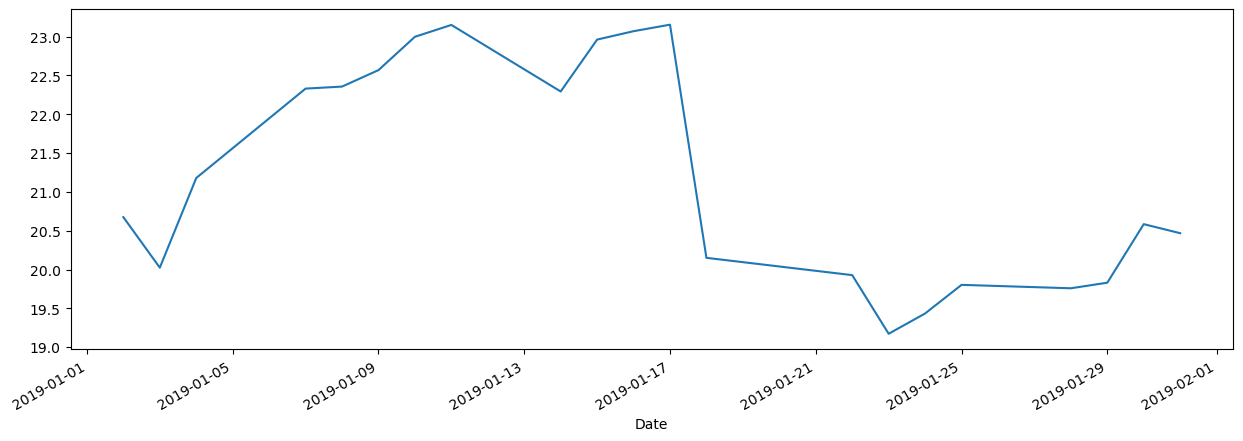

In [9]:
plt.figure(figsize=(15,5))
df201901.plot()
plt.show()

# 데이터 분리

In [10]:
len(df201901)

21

In [11]:
from sklearn.model_selection import TimeSeriesSplit

ts = 1 # test_size
mts = len(df201901.index) - ts # max_train_size
tss = TimeSeriesSplit(n_splits=int(len(df201901)/ts)-1, max_train_size=mts, test_size=ts)
for idx, (trn, val) in enumerate(tss.split(df201901)):
    print(idx, trn, val)

0 [0] [1]
1 [0 1] [2]
2 [0 1 2] [3]
3 [0 1 2 3] [4]
4 [0 1 2 3 4] [5]
5 [0 1 2 3 4 5] [6]
6 [0 1 2 3 4 5 6] [7]
7 [0 1 2 3 4 5 6 7] [8]
8 [0 1 2 3 4 5 6 7 8] [9]
9 [0 1 2 3 4 5 6 7 8 9] [10]
10 [ 0  1  2  3  4  5  6  7  8  9 10] [11]
11 [ 0  1  2  3  4  5  6  7  8  9 10 11] [12]
12 [ 0  1  2  3  4  5  6  7  8  9 10 11 12] [13]
13 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] [14]
14 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] [15]
15 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] [16]
16 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] [17]
17 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] [18]
18 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] [19]
19 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [20]


In [12]:
ndf = np.zeros([val[0], 21])
ndf = pd.DataFrame(ndf)
ndf

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
mts = 19
ts = 2
tss = TimeSeriesSplit(n_splits=int(len(df201901)/ts)-1, max_train_size=mts, test_size=ts)
for idx, (trn, val) in enumerate(tss.split(df201901)):
    print(idx, trn, val)

0 [0 1 2] [3 4]
1 [0 1 2 3 4] [5 6]
2 [0 1 2 3 4 5 6] [7 8]
3 [0 1 2 3 4 5 6 7 8] [ 9 10]
4 [ 0  1  2  3  4  5  6  7  8  9 10] [11 12]
5 [ 0  1  2  3  4  5  6  7  8  9 10 11 12] [13 14]
6 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] [15 16]
7 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] [17 18]
8 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] [19 20]


In [14]:
mts = 19
ts = 3
tss = TimeSeriesSplit(n_splits=int(len(df201901)/ts)-1, max_train_size=mts, test_size=ts)
for idx, (trn, val) in enumerate(tss.split(df201901)):
    print(idx, trn, val)

0 [0 1 2] [3 4 5]
1 [0 1 2 3 4 5] [6 7 8]
2 [0 1 2 3 4 5 6 7 8] [ 9 10 11]
3 [ 0  1  2  3  4  5  6  7  8  9 10 11] [12 13 14]
4 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] [15 16 17]
5 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] [18 19 20]


In [15]:
ts = 1 # test_size
mts = len(df201901.index) - ts # max_train_size
tss = TimeSeriesSplit(n_splits=int(len(df201901)/ts)-1, max_train_size=mts, test_size=ts)

for idx, (trn, val) in enumerate(tss.split(df201901)):
    if idx == 0:
        print(idx)
        print(trn, val)
        print(len(df201901.iloc[trn]))
        print(df201901.iloc[trn].values)
        print(df201901.iloc[val].values)
    ndf.iloc[idx, -(len(df201901.iloc[trn])+1):-1] = df201901.iloc[trn].values
    ndf.iloc[idx, -1] = df201901.iloc[val].values

0
[0] [1]
1
[20.674667]
[20.024]


In [16]:
ndf

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.674667,20.024000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.674667,20.024000,21.179333
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.674667,20.024000,21.179333,22.330667
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.674667,20.024000,21.179333,22.330667,22.356667
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,20.674667,20.024000,21.179333,22.330667,22.356667,22.568666
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,20.674667,20.024000,21.179333,22.330667,22.356667,22.568666,22.997999
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,20.674667,20.024000,21.179333,22.330667,22.356667,22.568666,22.997999,23.150667
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,20.674667,20.024000,21.179333,22.330667,22.356667,22.568666,22.997999,23.150667,22.293333
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.674667,20.024000,21.179333,22.330667,22.356667,22.568666,22.997999,23.150667,22.293333,22.962000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.024000,21.179333,22.330667,22.356667,22.568666,22.997999,23.150667,22.293333,22.962000,23.070000


In [17]:
# 1D convolutions and recurrent layers use(batch_size, sequence_length, features)

# 1번 모델: 2개의 히든 레이어, 각 8개씩 노드 구성 최종 1개 결과 예측
# 2번 모델: 1개의 1d convolution layer, 2개의 히든 레이어 8개 노드 (filter: 2개, 사이즈: 3)
# 3번 모델: 1개의 1d convolution layer, 2개의 히든 레이어 8개 노드 (filter: 10, 사이즈: 10)

# 예측: 2019-2월 전처리
# 1번, 2번, 3번 모델: 예측 후 결과 그래프 구현 (예측 결과 + 실제값 비교)

X = ndf.iloc[:, :-1].values
y = ndf.iloc[:, -1].values
X.shape

(20, 20)

# DL 모델 추가

In [18]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(None, X.shape[1],))
x = keras.layers.Dense(8, activation='relu')(inputs)
x = keras.layers.Dense(8, activation='relu')(x)
output = keras.layers.Dense(1)(x)

full_model = keras.Model(inputs, output)

full_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mse")
full_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 20)]        0         
                                                                 
 dense (Dense)               (None, None, 8)           168       
                                                                 
 dense_1 (Dense)             (None, None, 8)           72        
                                                                 
 dense_2 (Dense)             (None, None, 1)           9         
                                                                 
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


2022-11-28 17:44:06.882214: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(None, X.shape[1],))
x = tf.keras.layers.Conv1D(filters=2, kernel_size=3, padding='same', activation='relu')(inputs)
x = keras.layers.Dense(8, activation='relu')(x)
x = keras.layers.Dense(8, activation='relu')(x)
output = keras.layers.Dense(1)(x)

full_model1 = keras.Model(inputs, output)

full_model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mse")
full_model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, 20)]        0         
                                                                 
 conv1d (Conv1D)             (None, None, 2)           122       
                                                                 
 dense_3 (Dense)             (None, None, 8)           24        
                                                                 
 dense_4 (Dense)             (None, None, 8)           72        
                                                                 
 dense_5 (Dense)             (None, None, 1)           9         
                                                                 
Total params: 227
Trainable params: 227
Non-trainable params: 0
_________________________________________________________________


In [20]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(None, X.shape[1],))
x = tf.keras.layers.Conv1D(filters=30, kernel_size=5, padding='same', activation='relu')(inputs)
x = keras.layers.Dense(8, activation='relu')(x)
x = keras.layers.Dense(8, activation='relu')(x)
output = keras.layers.Dense(1)(x)

full_model2 = keras.Model(inputs, output)

full_model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mse")
full_model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, 20)]        0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 30)          3030      
                                                                 
 dense_6 (Dense)             (None, None, 8)           248       
                                                                 
 dense_7 (Dense)             (None, None, 8)           72        
                                                                 
 dense_8 (Dense)             (None, None, 1)           9         
                                                                 
Total params: 3,359
Trainable params: 3,359
Non-trainable params: 0
_________________________________________________________________


In [21]:
X_trn = X.reshape(-1, 1, X.shape[1])
X_trn

array([[[ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      ,  0.      ,  0.      , 20.674667]],

       [[ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      ,  0.      , 20.674667, 20.024   ]],

       [[ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      , 20.674667, 20.024   , 21.179333]],

       [[ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
          0.      , 20.674667, 

In [22]:
hist = full_model.fit(X_trn, y, epochs=500, batch_size=1)

Epoch 1/500
20/20 [==============================] - 0s 963us/step - loss: 172.0682
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 76.9312
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 14.2133
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 12.1068
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 6.1402
Epoch 6/500
20/20 [==============================] - 0s 1ms/step - loss: 5.0356
Epoch 7/500
20/20 [==============================] - 0s 1ms/step - loss: 8.1386
Epoch 8/500
20/20 [==============================] - 0s 1ms/step - loss: 10.4323
Epoch 9/500
20/20 [==============================] - 0s 1ms/step - loss: 2.6210
Epoch 10/500
20/20 [==============================] - 0s 1ms/step - loss: 3.2026
Epoch 11/500
20/20 [==============================] - 0s 1ms/step - loss: 3.0528
Epoch 12/500
20/20 [==============================] - 0s 1ms/step - loss: 2.4647
Epoch 13/500
20/20 [=========

20/20 [==============================] - 0s 939us/step - loss: 0.0987
Epoch 102/500
20/20 [==============================] - 0s 957us/step - loss: 0.0534
Epoch 103/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1188
Epoch 104/500
20/20 [==============================] - 0s 970us/step - loss: 0.1097
Epoch 105/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2999
Epoch 106/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2305
Epoch 107/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3625
Epoch 108/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1655
Epoch 109/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0777
Epoch 110/500
20/20 [==============================] - 0s 969us/step - loss: 0.0285
Epoch 111/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0197
Epoch 112/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0288
Epoch 113/500
20/20 [=

20/20 [==============================] - 0s 990us/step - loss: 2.0440e-04
Epoch 199/500
20/20 [==============================] - 0s 1ms/step - loss: 1.4791e-04
Epoch 200/500
20/20 [==============================] - 0s 966us/step - loss: 1.0968e-04
Epoch 201/500
20/20 [==============================] - 0s 1ms/step - loss: 5.8814e-05
Epoch 202/500
20/20 [==============================] - 0s 1ms/step - loss: 1.1947e-04
Epoch 203/500
20/20 [==============================] - 0s 1ms/step - loss: 6.0042e-05
Epoch 204/500
20/20 [==============================] - 0s 1ms/step - loss: 5.9532e-05
Epoch 205/500
20/20 [==============================] - 0s 1ms/step - loss: 8.4180e-05
Epoch 206/500
20/20 [==============================] - 0s 998us/step - loss: 1.3349e-04
Epoch 207/500
20/20 [==============================] - 0s 917us/step - loss: 3.9783e-05
Epoch 208/500
20/20 [==============================] - 0s 945us/step - loss: 5.7235e-05
Epoch 209/500
20/20 [==============================] - 0s 

20/20 [==============================] - 0s 1ms/step - loss: 1.2283
Epoch 296/500
20/20 [==============================] - 0s 1ms/step - loss: 1.9392
Epoch 297/500
20/20 [==============================] - 0s 1ms/step - loss: 2.2089
Epoch 298/500
20/20 [==============================] - 0s 1ms/step - loss: 2.5377
Epoch 299/500
20/20 [==============================] - 0s 1ms/step - loss: 2.0378
Epoch 300/500
20/20 [==============================] - 0s 1ms/step - loss: 0.5981
Epoch 301/500
20/20 [==============================] - 0s 965us/step - loss: 0.4302
Epoch 302/500
20/20 [==============================] - 0s 982us/step - loss: 0.9963
Epoch 303/500
20/20 [==============================] - 0s 976us/step - loss: 1.3862
Epoch 304/500
20/20 [==============================] - 0s 940us/step - loss: 0.5028
Epoch 305/500
20/20 [==============================] - 0s 952us/step - loss: 0.5799
Epoch 306/500
20/20 [==============================] - 0s 956us/step - loss: 0.3176
Epoch 307/500
20/2

Epoch 394/500
20/20 [==============================] - 0s 960us/step - loss: 0.0337
Epoch 395/500
20/20 [==============================] - 0s 967us/step - loss: 0.0273
Epoch 396/500
20/20 [==============================] - 0s 976us/step - loss: 0.0134
Epoch 397/500
20/20 [==============================] - 0s 962us/step - loss: 0.0152
Epoch 398/500
20/20 [==============================] - 0s 945us/step - loss: 0.0195
Epoch 399/500
20/20 [==============================] - 0s 961us/step - loss: 0.0296
Epoch 400/500
20/20 [==============================] - 0s 940us/step - loss: 0.0636
Epoch 401/500
20/20 [==============================] - 0s 928us/step - loss: 0.0695
Epoch 402/500
20/20 [==============================] - 0s 975us/step - loss: 0.0317
Epoch 403/500
20/20 [==============================] - 0s 935us/step - loss: 0.0509
Epoch 404/500
20/20 [==============================] - 0s 951us/step - loss: 0.1068
Epoch 405/500
20/20 [==============================] - 0s 951us/step - loss:

20/20 [==============================] - 0s 1ms/step - loss: 1.1427
Epoch 493/500
20/20 [==============================] - 0s 1ms/step - loss: 1.3425
Epoch 494/500
20/20 [==============================] - 0s 1ms/step - loss: 2.1976
Epoch 495/500
20/20 [==============================] - 0s 1ms/step - loss: 1.1661
Epoch 496/500
20/20 [==============================] - 0s 1ms/step - loss: 0.7251
Epoch 497/500
20/20 [==============================] - 0s 1ms/step - loss: 0.7173
Epoch 498/500
20/20 [==============================] - 0s 1ms/step - loss: 1.1553
Epoch 499/500
20/20 [==============================] - 0s 1ms/step - loss: 1.0820
Epoch 500/500
20/20 [==============================] - 0s 1ms/step - loss: 0.4309


In [23]:
hist1 = full_model1.fit(X_trn, y, epochs=500, batch_size=1)

Epoch 1/500
20/20 [==============================] - 0s 1ms/step - loss: 453.5079
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 401.6636
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 173.0544
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 67.1859
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 32.1567
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 16.7795
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 11.2849
Epoch 8/500
20/20 [==============================] - 0s 2ms/step - loss: 10.5389
Epoch 9/500
20/20 [==============================] - 0s 1ms/step - loss: 8.6680
Epoch 10/500
20/20 [==============================] - 0s 1ms/step - loss: 7.6112
Epoch 11/500
20/20 [==============================] - 0s 2ms/step - loss: 7.7149
Epoch 12/500
20/20 [==============================] - 0s 2ms/step - loss: 7.4900
Epoch 13/500
20/20 [======

20/20 [==============================] - 0s 1ms/step - loss: 0.0743
Epoch 103/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0404
Epoch 104/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0303
Epoch 105/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0335
Epoch 106/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0821
Epoch 107/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0281
Epoch 108/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0156
Epoch 109/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0273
Epoch 110/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0281
Epoch 111/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0167
Epoch 112/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 113/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 114/500
20/20 [=========

20/20 [==============================] - 0s 1ms/step - loss: 0.7343
Epoch 203/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3097
Epoch 204/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2491
Epoch 205/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0551
Epoch 206/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0589
Epoch 207/500
20/20 [==============================] - 0s 992us/step - loss: 0.0657
Epoch 208/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0464
Epoch 209/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0410
Epoch 210/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0293
Epoch 211/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0224
Epoch 212/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0305
Epoch 213/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0702
Epoch 214/500
20/20 [=======

20/20 [==============================] - 0s 1000us/step - loss: 0.0684
Epoch 302/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1083
Epoch 303/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1160
Epoch 304/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0446
Epoch 305/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0355
Epoch 306/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0818
Epoch 307/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0958
Epoch 308/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0839
Epoch 309/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1030
Epoch 310/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0185
Epoch 311/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0439
Epoch 312/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0588
Epoch 313/500
20/20 [======

20/20 [==============================] - 0s 1ms/step - loss: 0.1666
Epoch 401/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0559
Epoch 402/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0372
Epoch 403/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0373
Epoch 404/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0238
Epoch 405/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0168
Epoch 406/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0131
Epoch 407/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 408/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 409/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 410/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 411/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0126
Epoch 412/500
20/20 [=========

20/20 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 500/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0018


In [24]:
hist2 = full_model2.fit(X_trn, y, epochs=500, batch_size=1)

Epoch 1/500
20/20 [==============================] - 0s 1ms/step - loss: 101.4559
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 44.1412
Epoch 3/500
20/20 [==============================] - 0s 2ms/step - loss: 18.4447
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 8.7124
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 8.1269
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 6.1150
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 4.0962
Epoch 8/500
20/20 [==============================] - 0s 2ms/step - loss: 2.2567
Epoch 9/500
20/20 [==============================] - 0s 2ms/step - loss: 2.4778
Epoch 10/500
20/20 [==============================] - 0s 2ms/step - loss: 0.8644
Epoch 11/500
20/20 [==============================] - 0s 2ms/step - loss: 0.6478
Epoch 12/500
20/20 [==============================] - 0s 2ms/step - loss: 0.8723
Epoch 13/500
20/20 [=============

20/20 [==============================] - 0s 1ms/step - loss: 0.0209
Epoch 103/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 104/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0393
Epoch 105/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 106/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0223
Epoch 107/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 108/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 109/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 110/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0210
Epoch 111/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 112/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0197
Epoch 113/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0224
Epoch 114/500
20/20 [=========

20/20 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 203/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 204/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 205/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 206/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0286
Epoch 207/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0673
Epoch 208/500
20/20 [==============================] - 0s 1ms/step - loss: 0.1488
Epoch 209/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0941
Epoch 210/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0600
Epoch 211/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0386
Epoch 212/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0392
Epoch 213/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0459
Epoch 214/500
20/20 [=========

20/20 [==============================] - 0s 1ms/step - loss: 0.5387
Epoch 303/500
20/20 [==============================] - 0s 1ms/step - loss: 0.9500
Epoch 304/500
20/20 [==============================] - 0s 2ms/step - loss: 1.1689
Epoch 305/500
20/20 [==============================] - 0s 1ms/step - loss: 10.7797
Epoch 306/500
20/20 [==============================] - 0s 1ms/step - loss: 9.7021
Epoch 307/500
20/20 [==============================] - 0s 1ms/step - loss: 1.9528
Epoch 308/500
20/20 [==============================] - 0s 1ms/step - loss: 1.8538
Epoch 309/500
20/20 [==============================] - 0s 2ms/step - loss: 2.0103
Epoch 310/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2854
Epoch 311/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2188
Epoch 312/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3058
Epoch 313/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2313
Epoch 314/500
20/20 [========

20/20 [==============================] - 0s 1ms/step - loss: 0.0438
Epoch 403/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0202
Epoch 404/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0213
Epoch 405/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0386
Epoch 406/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0530
Epoch 407/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0232
Epoch 408/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0208
Epoch 409/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 410/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 411/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 412/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 413/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 414/500
20/20 [=========

/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_4233/3867567350.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist.history['loss'], 'y', c='blue', label = 'train loss_no')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_4233/3867567350.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist1.history['loss'], 'y', c='green', label = 'train loss1')
/var/folders/t4/vwr916y50fv3wcm0xlgfkyg00000gn/T/ipykernel_4233/3867567350.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  loss_ax.plot(hist2.history['loss'], 'y', c='skyblue', label = 'train loss2')


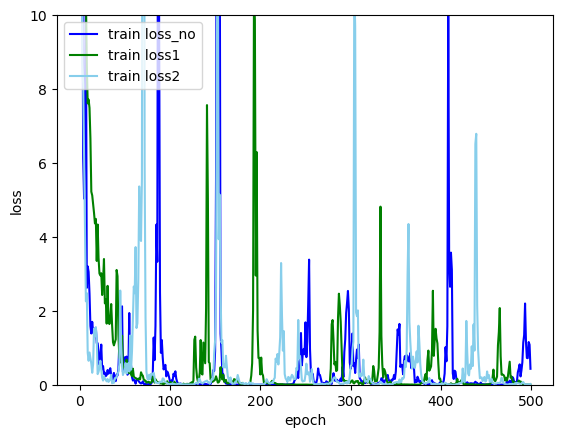

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
# acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', c='blue', label = 'train loss_no')
loss_ax.plot(hist1.history['loss'], 'y', c='green', label = 'train loss1')
loss_ax.plot(hist2.history['loss'], 'y', c='skyblue', label = 'train loss2')
# loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
# acc_ax.plot(hist.history['accuracy'], 'b', label = 'train accuracy')
# acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
# acc_ax.set_xlabel('accuracy')

loss_ax.legend(loc = 'upper left')
# acc_ax.legend(loc = 'lower left')

loss_ax.set_ylim(0, 10)

plt.show()

In [26]:
# 학습된 모델로 2020년 주가 예측
df201902 = df['2019-01':'2019-02']
df201902 = df201902.iloc[:, -2]

print(df201902)
print(len(df201901))
print(df201902['2019-02'])
print(len(df201902['2019-02']))

Date
2019-01-02    20.674667
2019-01-03    20.024000
2019-01-04    21.179333
2019-01-07    22.330667
2019-01-08    22.356667
2019-01-09    22.568666
2019-01-10    22.997999
2019-01-11    23.150667
2019-01-14    22.293333
2019-01-15    22.962000
2019-01-16    23.070000
2019-01-17    23.153999
2019-01-18    20.150667
2019-01-22    19.927999
2019-01-23    19.172667
2019-01-24    19.434000
2019-01-25    19.802668
2019-01-28    19.758667
2019-01-29    19.830667
2019-01-30    20.584667
2019-01-31    20.468000
2019-02-01    20.813999
2019-02-04    20.859333
2019-02-05    21.423332
2019-02-06    21.148001
2019-02-07    20.500668
2019-02-08    20.386667
2019-02-11    20.856001
2019-02-12    20.787333
2019-02-13    20.544666
2019-02-14    20.251333
2019-02-15    20.525333
2019-02-19    20.375999
2019-02-20    20.170668
2019-02-21    19.415333
2019-02-22    19.647333
2019-02-25    19.917999
2019-02-26    19.857332
2019-02-27    20.982668
2019-02-28    21.325333
Name: Adj Close, dtype: float64
21


In [27]:
tss1 = TimeSeriesSplit(n_splits=len(df201902['2019-02']), 
                      max_train_size=mts, test_size=ts)

for trn, val in tss1.split(df201902):
    trn, val
    print(trn, val)

ndf201902 = np.zeros([19, 21])
ndf201902 = pd.DataFrame(ndf201902)
ndf201902

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [21]
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] [22]
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] [23]
[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] [24]
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [25]
[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25] [26]
[ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26] [27]
[ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27] [28]
[ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28] [29]
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29] [30]
[11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30] [31]
[12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31] [32]
[13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32] [33]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33] [34]
[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34] 

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
ndf

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.674667,20.024000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.674667,20.024000,21.179333
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.674667,20.024000,21.179333,22.330667
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.674667,20.024000,21.179333,22.330667,22.356667
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,20.674667,20.024000,21.179333,22.330667,22.356667,22.568666
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,20.674667,20.024000,21.179333,22.330667,22.356667,22.568666,22.997999
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,20.674667,20.024000,21.179333,22.330667,22.356667,22.568666,22.997999,23.150667
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,20.674667,20.024000,21.179333,22.330667,22.356667,22.568666,22.997999,23.150667,22.293333
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.674667,20.024000,21.179333,22.330667,22.356667,22.568666,22.997999,23.150667,22.293333,22.962000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.024000,21.179333,22.330667,22.356667,22.568666,22.997999,23.150667,22.293333,22.962000,23.070000


In [29]:
for idx, (trn, val) in enumerate(tss1.split(df201902)):
    ndf201902.iloc[idx, -(len(df201902.iloc[trn])+1):-1] = df201902.iloc[trn].values
    ndf201902.iloc[idx, -1] = df201902.iloc[val].values

ndf201902

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,20.024000,21.179333,22.330667,22.356667,22.568666,22.997999,23.150667,22.293333,22.962000,23.070000,...,20.150667,19.927999,19.172667,19.434000,19.802668,19.758667,19.830667,20.584667,20.468000,20.813999
1,21.179333,22.330667,22.356667,22.568666,22.997999,23.150667,22.293333,22.962000,23.070000,23.153999,...,19.927999,19.172667,19.434000,19.802668,19.758667,19.830667,20.584667,20.468000,20.813999,20.859333
2,22.330667,22.356667,22.568666,22.997999,23.150667,22.293333,22.962000,23.070000,23.153999,20.150667,...,19.172667,19.434000,19.802668,19.758667,19.830667,20.584667,20.468000,20.813999,20.859333,21.423332
3,22.356667,22.568666,22.997999,23.150667,22.293333,22.962000,23.070000,23.153999,20.150667,19.927999,...,19.434000,19.802668,19.758667,19.830667,20.584667,20.468000,20.813999,20.859333,21.423332,21.148001
4,22.568666,22.997999,23.150667,22.293333,22.962000,23.070000,23.153999,20.150667,19.927999,19.172667,...,19.802668,19.758667,19.830667,20.584667,20.468000,20.813999,20.859333,21.423332,21.148001,20.500668
5,22.997999,23.150667,22.293333,22.962000,23.070000,23.153999,20.150667,19.927999,19.172667,19.434000,...,19.758667,19.830667,20.584667,20.468000,20.813999,20.859333,21.423332,21.148001,20.500668,20.386667
6,23.150667,22.293333,22.962000,23.070000,23.153999,20.150667,19.927999,19.172667,19.434000,19.802668,...,19.830667,20.584667,20.468000,20.813999,20.859333,21.423332,21.148001,20.500668,20.386667,20.856001
7,22.293333,22.962000,23.070000,23.153999,20.150667,19.927999,19.172667,19.434000,19.802668,19.758667,...,20.584667,20.468000,20.813999,20.859333,21.423332,21.148001,20.500668,20.386667,20.856001,20.787333
8,22.962000,23.070000,23.153999,20.150667,19.927999,19.172667,19.434000,19.802668,19.758667,19.830667,...,20.468000,20.813999,20.859333,21.423332,21.148001,20.500668,20.386667,20.856001,20.787333,20.544666
9,23.070000,23.153999,20.150667,19.927999,19.172667,19.434000,19.802668,19.758667,19.830667,20.584667,...,20.813999,20.859333,21.423332,21.148001,20.500668,20.386667,20.856001,20.787333,20.544666,20.251333


In [30]:
# 1D convolutions and recurrent layers use(batch_size, sequence_length, features)
X_test = ndf201902.iloc[:, :-1].values
X_tst = X_test.reshape(-1, 1, X_test.shape[1])
y_tst = ndf201902.iloc[:, -1].values

In [31]:
full_model.evaluate(X_tst, y_tst)

1/1 [==============================] - 0s 146ms/step - loss: 1.8674


1.8673756122589111

In [32]:
full_model1.evaluate(X_tst, y_tst)

1/1 [==============================] - 0s 121ms/step - loss: 0.5305


0.5304856300354004

In [33]:
full_model2.evaluate(X_tst, y_tst)

1/1 [==============================] - 0s 123ms/step - loss: 0.4510


0.45101451873779297

In [34]:
X_tst[0]

array([[20.024   , 21.179333, 22.330667, 22.356667, 22.568666, 22.997999,
        23.150667, 22.293333, 22.962   , 23.07    , 23.153999, 20.150667,
        19.927999, 19.172667, 19.434   , 19.802668, 19.758667, 19.830667,
        20.584667, 20.468   ]])

In [35]:
np.array([[[20.024   , 21.179333, 22.330667, 22.356667, 22.568666, 22.997999,
        23.150667, 22.293333, 22.962   , 23.07    , 23.153999, 20.150667,
        19.927999, 19.172667, 19.434   , 19.802668, 19.758667, 19.830667,
        20.584667, 20.468   ]]]).shape

(1, 1, 20)

In [36]:
full_model.predict([[[20.024   , 21.179333, 22.330667, 22.356667, 22.568666, 22.997999,
        23.150667, 22.293333, 22.962   , 23.07    , 23.153999, 20.150667,
        19.927999, 19.172667, 19.434   , 19.802668, 19.758667, 19.830667,
        20.584667, 20.468   ]]])

1/1 [==============================] - 0s 133ms/step


array([[[21.11921]]], dtype=float32)

In [37]:
pred201902_n = full_model.predict(X_tst)
pred201902_1 = full_model1.predict(X_tst)
pred201902_2 = full_model2.predict(X_tst)

pred201902_n.reshape(1, len(pred202902_n))

1/1 [==============================] - 0s 99ms/step


NameError: name 'pred202902_n' is not defined

In [ ]:
df201902.values

In [ ]:
df201902.index

In [ ]:
pred201902_n.flatten()

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df201902.index[-19:], pred201902_n.flatten(), ls='--')
plt.plot(df201902.index[-19:], pred201902_1.flatten(), ls='--')
plt.plot(df201902.index[-19:], pred201902_2.flatten(), ls='--')
plt.plot(df201902.index[-19:], df201902[-19:].values, lw=3)
plt.legend(['pred', 'pred1', 'pred2', 'true'])
plt.show()